In [ ]:
#Enlazamos con google drive y obtenemos los archivos del directorio en el que están los textos
from google.colab import drive
drive.mount('/content/drive')
import os
dir = '/content/drive/MyDrive/TFG/Material Inicial'
os.chdir(dir)

In [ ]:
import pandas as pd
dfTrain = pd.read_csv("train.csv")
dfTest  = pd.read_csv("test.csv")
dfValidation = pd.read_csv("validation.csv")

In [ ]:
dfTotal = dfTrain
dfTotal= pd.concat([dfTotal,dfTest], ignore_index=True)
dfTotal= pd.concat([dfTotal,dfValidation], ignore_index=True)


Gráficas de Barras


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
arrayTrain=dfTrain["label"].value_counts(normalize=True)
arrayTest=dfTest["label"].value_counts(normalize=True)
arrayValidation=dfValidation["label"].value_counts(normalize=True)

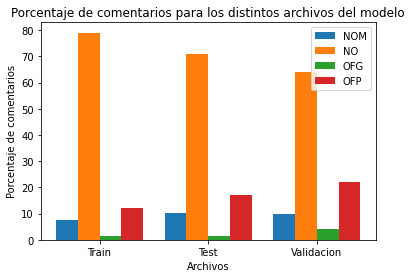

In [ ]:
serie_1 = [arrayTrain[3]*100,arrayTest[3]*100,arrayValidation[3]*100]
serie_2 = [arrayTrain[2]*100,arrayTest[2]*100,arrayValidation[2]*100]
serie_3 = [arrayTrain[1]*100,arrayTest[1]*100,arrayValidation[1]*100]
serie_4 = [arrayTrain[0]*100,arrayTest[0]*100,arrayValidation[0]*100]
 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.2
 
plt.bar(indice_barras, serie_1, width=ancho_barras, label='NOM')
plt.bar(indice_barras+ancho_barras, serie_2, width=ancho_barras, label='NO')
plt.bar(indice_barras+ancho_barras*2, serie_3, width= ancho_barras, label='OFG')
plt.bar(indice_barras+ancho_barras*3, serie_4, width=ancho_barras, label='OFP')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras+ancho_barras+0.1, ("Train","Test","Validacion"))
 
plt.ylabel('Porcentaje de comentarios')
plt.xlabel('Archivos')
plt.title('Porcentaje de comentarios para los distintos archivos del modelo')
 
plt.show()

In [ ]:
arrayTrainNoNormalized=dfTrain["label"].value_counts()
arrayTestNoNormalized=dfTest["label"].value_counts()
arrayValidationNoNormalized=dfValidation["label"].value_counts()

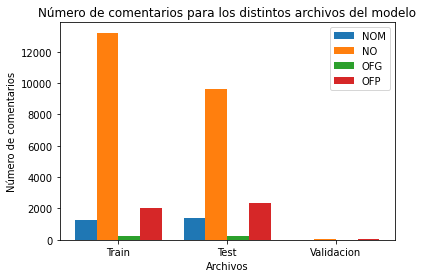

In [ ]:
serie_1 = [arrayTrainNoNormalized[3],arrayTestNoNormalized[3],arrayValidationNoNormalized[3]]
serie_2 = [arrayTrainNoNormalized[2],arrayTestNoNormalized[2],arrayValidationNoNormalized[2]]
serie_3 = [arrayTrainNoNormalized[1],arrayTestNoNormalized[1],arrayValidationNoNormalized[1]]
serie_4 = [arrayTrainNoNormalized[0],arrayTestNoNormalized[0],arrayValidationNoNormalized[0]]
 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.2
 
plt.bar(indice_barras, serie_1, width=ancho_barras, label='NOM')
plt.bar(indice_barras+ancho_barras, serie_2, width=ancho_barras, label='NO')
plt.bar(indice_barras+ancho_barras*2, serie_3, width= ancho_barras, label='OFG')
plt.bar(indice_barras+ancho_barras*3, serie_4, width=ancho_barras, label='OFP')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras+ancho_barras+0.1, ("Train","Test","Validacion"))
 
plt.ylabel('Número de comentarios')
plt.xlabel('Archivos')
plt.title('Número de comentarios para los distintos archivos del modelo')
 
plt.show()

In [ ]:
print(arrayTrainNoNormalized)
print(arrayTestNoNormalized)
print(arrayValidationNoNormalized)

2    13212
0     2051
3     1235
1      212
Name: label, dtype: int64
2    9651
0    2340
3    1404
1     211
Name: label, dtype: int64
2    64
0    22
3    10
1     4
Name: label, dtype: int64


Por influencer:

In [ ]:
#Creamos los diccionarios de comentarios de cada archivo
dicInfluencerTrain={}
for i in dfTrain["influencer"].unique().tolist():
  dicInfluencerTrain[i]=[0,0,0,0]

dicInfluencerTest={}
for i in dfTest["influencer"].unique().tolist():
  dicInfluencerTest[i]=[0,0,0,0]

dicInfluencerValidation={}
for i in dfValidation["influencer"].unique().tolist():
  dicInfluencerValidation[i]=[0,0,0,0]

dicInfluencerTotal={}
for i in dfTotal["influencer"].unique().tolist():
  dicInfluencerTotal[i]=[0,0,0,0]

# Recorremos los comentarios, actualizando los diccionarios creados anteriormente:
for i in dfTrain.index:
  dicInfluencerTrain[dfTrain["influencer"][i]][dfTrain["label"][i]] += 1

for i in dfTest.index:
  dicInfluencerTest[dfTest["influencer"][i]][dfTest["label"][i]] += 1

for i in dfValidation.index:
  dicInfluencerValidation[dfValidation["influencer"][i]][dfValidation["label"][i]] += 1

for i in dfTotal.index:
  dicInfluencerTotal[dfTotal["influencer"][i]][dfTotal["label"][i]] += 1

# Vemos el numero de comentarios que recibe cada influencer:
arrayTrainNumComentariosInfluencer=dfTrain["influencer"].value_counts()

arrayTestNumComentariosInfluencer=dfTest["influencer"].value_counts()

arrayValidationNumComentariosInfluencer=dfValidation["influencer"].value_counts()

arrayTotalNumComentariosInfluencer=dfTotal["influencer"].value_counts()

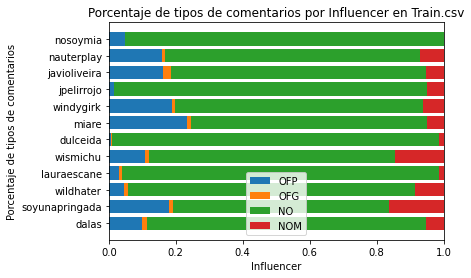

In [ ]:
grupos = dfTrain["influencer"].unique().tolist()
ofp = []
ofg = []
no = []
nom = []

for i in dfTrain["influencer"].unique().tolist():
  ofp.append(dicInfluencerTrain[i][0]/arrayTrainNumComentariosInfluencer[i])
  ofg.append(dicInfluencerTrain[i][1]/arrayTrainNumComentariosInfluencer[i])
  no.append(dicInfluencerTrain[i][2]/arrayTrainNumComentariosInfluencer[i])
  nom.append(dicInfluencerTrain[i][3]/arrayTrainNumComentariosInfluencer[i])



indice = np.arange(len(grupos))
 
plt.barh(indice, ofp, label='OFP')
plt.barh(indice, ofg, label='OFG',left=np.array(ofp))
plt.barh(indice, no, label='NO',left=np.array(ofp)+np.array(ofg))
plt.barh(indice, nom, label='NOM',left=np.array(ofp)+np.array(ofg)+np.array(no)) 
 
plt.yticks(indice, grupos)
plt.ylabel("Porcentaje de tipos de comentarios")
plt.xlabel("Influencer")
plt.title('Porcentaje de tipos de comentarios por Influencer en Train.csv')
plt.legend(loc='best')
 
plt.show()

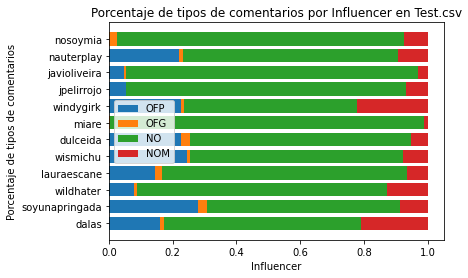

In [ ]:
grupos = dfTest["influencer"].unique().tolist()
ofp = []
ofg = []
no = []
nom = []

for i in dfTest["influencer"].unique().tolist():
  ofp.append(dicInfluencerTest[i][0]/arrayTestNumComentariosInfluencer[i])
  ofg.append(dicInfluencerTest[i][1]/arrayTestNumComentariosInfluencer[i])
  no.append(dicInfluencerTest[i][2]/arrayTestNumComentariosInfluencer[i])
  nom.append(dicInfluencerTest[i][3]/arrayTestNumComentariosInfluencer[i])



indice = np.arange(len(grupos))
 
plt.barh(indice, ofp, label='OFP')
plt.barh(indice, ofg, label='OFG',left=np.array(ofp))
plt.barh(indice, no, label='NO',left=np.array(ofp)+np.array(ofg))
plt.barh(indice, nom, label='NOM',left=np.array(ofp)+np.array(ofg)+np.array(no)) 
 
plt.yticks(indice, grupos)
plt.ylabel("Porcentaje de tipos de comentarios")
plt.xlabel("Influencer")
plt.title('Porcentaje de tipos de comentarios por Influencer en Test.csv')
plt.legend(loc='best')
 
plt.show()

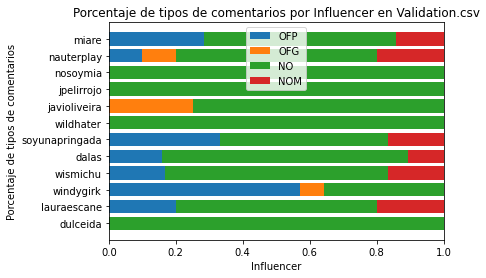

In [ ]:
grupos = dfValidation["influencer"].unique().tolist()
ofp = []
ofg = []
no = []
nom = []

for i in dfValidation["influencer"].unique().tolist():
  ofp.append(dicInfluencerValidation[i][0]/arrayValidationNumComentariosInfluencer[i])
  ofg.append(dicInfluencerValidation[i][1]/arrayValidationNumComentariosInfluencer[i])
  no.append(dicInfluencerValidation[i][2]/arrayValidationNumComentariosInfluencer[i])
  nom.append(dicInfluencerValidation[i][3]/arrayValidationNumComentariosInfluencer[i])



indice = np.arange(len(grupos))
 
plt.barh(indice, ofp, label='OFP')
plt.barh(indice, ofg, label='OFG',left=np.array(ofp))
plt.barh(indice, no, label='NO',left=np.array(ofp)+np.array(ofg))
plt.barh(indice, nom, label='NOM',left=np.array(ofp)+np.array(ofg)+np.array(no)) 
 
plt.yticks(indice, grupos)
plt.ylabel("Porcentaje de tipos de comentarios")
plt.xlabel("Influencer")
plt.title('Porcentaje de tipos de comentarios por Influencer en Validation.csv')
plt.legend(loc='best')
 
plt.show()

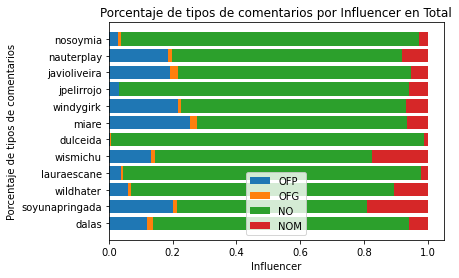

In [ ]:
grupos = dfTotal["influencer"].unique().tolist()
ofp = []
ofg = []
no = []
nom = []

for i in dfTotal["influencer"].unique().tolist():
  ofp.append(dicInfluencerTotal[i][0]/arrayTotalNumComentariosInfluencer[i])
  ofg.append(dicInfluencerTotal[i][1]/arrayTotalNumComentariosInfluencer[i])
  no.append(dicInfluencerTotal[i][2]/arrayTotalNumComentariosInfluencer[i])
  nom.append(dicInfluencerTotal[i][3]/arrayTotalNumComentariosInfluencer[i])



indice = np.arange(len(grupos))
 
plt.barh(indice, ofp, label='OFP')
plt.barh(indice, ofg, label='OFG',left=np.array(ofp))
plt.barh(indice, no, label='NO',left=np.array(ofp)+np.array(ofg))
plt.barh(indice, nom, label='NOM',left=np.array(ofp)+np.array(ofg)+np.array(no)) 
 
plt.yticks(indice, grupos)
plt.ylabel("Porcentaje de tipos de comentarios")
plt.xlabel("Influencer")
plt.title('Porcentaje de tipos de comentarios por Influencer en Total')
plt.legend(loc='best')
 
plt.show()

In [ ]:
print(dfTotal["influencer"].unique().tolist())
print(ofp) 
print(ofg) 
print(no) 
print(nom) 

['dalas', 'soyunapringada', 'wildhater', 'lauraescane', 'wismichu', 'dulceida', 'miare', 'windygirk', 'jpelirrojo', 'javioliveira', 'nauterplay', 'nosoymia']
[0.11885347170743761, 0.20168067226890757, 0.059092991296381125, 0.03787878787878788, 0.13281799016163034, 0.00473186119873817, 0.25414123801220573, 0.21770257077774163, 0.03054989816700611, 0.19033566949465142, 0.18536009445100354, 0.02830188679245283]
[0.01816160118606375, 0.011292016806722689, 0.010994044892349977, 0.006493506493506494, 0.010541110330288124, 0.0015772870662460567, 0.020924149956408022, 0.009111617312072893, 0.0, 0.026558465510881594, 0.011806375442739079, 0.009433962264150943]
[0.8052878675562145, 0.5969012605042017, 0.8250114521300962, 0.9345238095238095, 0.6809557273366128, 0.9810725552050473, 0.6586748038360941, 0.7045232671656362, 0.9124236252545825, 0.7303578015492438, 0.7219598583234947, 0.9339622641509434]
[0.05769705955028416, 0.19012605042016806, 0.1049015116811727, 0.021103896103896104, 0.175685172171

Por genero

In [ ]:
#Creamos los diccionarios de comentarios de cada archivo
dicInfluencerGenderTrain={}
for i in dfTrain["influencer_gender"].unique().tolist():
  dicInfluencerGenderTrain[i]=[0,0,0,0]

dicInfluencerGenderTest={}
for i in dfTest["influencer_gender"].unique().tolist():
  dicInfluencerGenderTest[i]=[0,0,0,0]

dicInfluencerGenderValidation={}
for i in dfValidation["influencer_gender"].unique().tolist():
  dicInfluencerGenderValidation[i]=[0,0,0,0]

dicInfluencerGenderTotal={}
for i in dfTotal["influencer_gender"].unique().tolist():
  dicInfluencerGenderTotal[i]=[0,0,0,0]

# Recorremos los comentarios, actualizando los diccionarios creados anteriormente:
for i in dfTrain.index:
  dicInfluencerGenderTrain[dfTrain["influencer_gender"][i]][dfTrain["label"][i]] += 1

for i in dfTest.index:
  dicInfluencerGenderTest[dfTest["influencer_gender"][i]][dfTest["label"][i]] += 1

for i in dfValidation.index:
  dicInfluencerGenderValidation[dfValidation["influencer_gender"][i]][dfValidation["label"][i]] += 1

for i in dfTotal.index:
  dicInfluencerGenderTotal[dfTotal["influencer_gender"][i]][dfTotal["label"][i]] += 1

# Vemos el numero de comentarios que recibe cada influencer:
arrayTrainNumComentariosInfluencerGender=dfTrain["influencer_gender"].value_counts()

arrayTestNumComentariosInfluencerGender=dfTest["influencer_gender"].value_counts()

arrayValidationNumComentariosInfluencerGender=dfValidation["influencer_gender"].value_counts()

arrayTotalNumComentariosInfluencerGender=dfTotal["influencer_gender"].value_counts()

In [ ]:
dicInfluencerGenderTrain

{'man': [1045, 148, 7996, 716], 'woman': [1006, 64, 5216, 519]}

In [ ]:
arrayTrainNumComentariosInfluencerGender

man      9905
woman    6805
Name: influencer_gender, dtype: int64

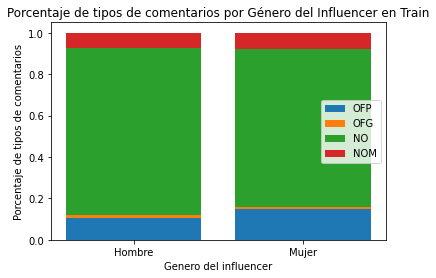

In [ ]:
grupos = dfTrain["influencer_gender"].unique().tolist()
ofp = []
ofg = []
no = []
nom = []

for i in dfTotal["influencer_gender"].unique().tolist():
  ofp.append(dicInfluencerGenderTrain[i][0]/arrayTrainNumComentariosInfluencerGender[i])
  ofg.append(dicInfluencerGenderTrain[i][1]/arrayTrainNumComentariosInfluencerGender[i])
  no.append(dicInfluencerGenderTrain[i][2]/arrayTrainNumComentariosInfluencerGender[i])
  nom.append(dicInfluencerGenderTrain[i][3]/arrayTrainNumComentariosInfluencerGender[i])



indice = np.arange(len(grupos))
 
plt.bar(indice, ofp, label='OFP')
plt.bar(indice, ofg, label='OFG',bottom=np.array(ofp))
plt.bar(indice, no, label='NO',bottom=np.array(ofp)+np.array(ofg))
plt.bar(indice, nom, label='NOM',bottom=np.array(ofp)+np.array(ofg)+np.array(no)) 
 
plt.xticks(indice, ["Hombre","Mujer"])
plt.ylabel("Porcentaje de tipos de comentarios")
plt.xlabel("Genero del influencer")
plt.title('Porcentaje de tipos de comentarios por Género del Influencer en Train')
plt.legend(loc='best')
 
plt.show()

In [ ]:
grupos = dfTest["influencer_gender"].unique().tolist()
ofp = []
ofg = []
no = []
nom = []

for i in dfTotal["influencer_gender"].unique().tolist():
  ofp.append(dicInfluencerGenderTest[i][0]/arrayTestNumComentariosInfluencerGender[i])
  ofg.append(dicInfluencerGenderTest[i][1]/arrayTestNumComentariosInfluencerGender[i])
  no.append(dicInfluencerGenderTest[i][2]/arrayTestNumComentariosInfluencerGender[i])
  nom.append(dicInfluencerGenderTest[i][3]/arrayTestNumComentariosInfluencerGender[i])



indice = np.arange(len(grupos))
 
plt.bar(indice, ofp, label='OFP')
plt.bar(indice, ofg, label='OFG',bottom=np.array(ofp))
plt.bar(indice, no, label='NO',bottom=np.array(ofp)+np.array(ofg))
plt.bar(indice, nom, label='NOM',bottom=np.array(ofp)+np.array(ofg)+np.array(no)) 
 
plt.xticks(indice, ["Hombre","Mujer"])
plt.ylabel("Porcentaje de tipos de comentarios")
plt.xlabel("Genero del influencer")
plt.title('Porcentaje de tipos de comentarios por Género del Influencer en Test')
plt.legend(loc='best')
 
plt.show()

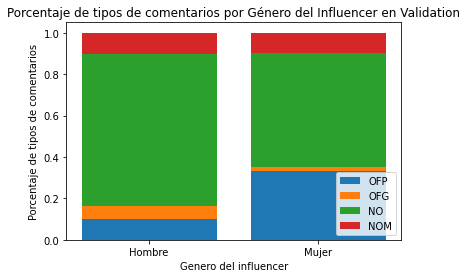

In [ ]:
grupos = dfValidation["influencer_gender"].unique().tolist()
ofp = []
ofg = []
no = []
nom = []

for i in dfTotal["influencer_gender"].unique().tolist():
  ofp.append(dicInfluencerGenderValidation[i][0]/arrayValidationNumComentariosInfluencerGender[i])
  ofg.append(dicInfluencerGenderValidation[i][1]/arrayValidationNumComentariosInfluencerGender[i])
  no.append(dicInfluencerGenderValidation[i][2]/arrayValidationNumComentariosInfluencerGender[i])
  nom.append(dicInfluencerGenderValidation[i][3]/arrayValidationNumComentariosInfluencerGender[i])



indice = np.arange(len(grupos))
 
plt.bar(indice, ofp, label='OFP')
plt.bar(indice, ofg, label='OFG',bottom=np.array(ofp))
plt.bar(indice, no, label='NO',bottom=np.array(ofp)+np.array(ofg))
plt.bar(indice, nom, label='NOM',bottom=np.array(ofp)+np.array(ofg)+np.array(no)) 
 
plt.xticks(indice, ["Hombre","Mujer"])
plt.ylabel("Porcentaje de tipos de comentarios")
plt.xlabel("Genero del influencer")
plt.title('Porcentaje de tipos de comentarios por Género del Influencer en Validation')
plt.legend(loc='best')
 
plt.show()

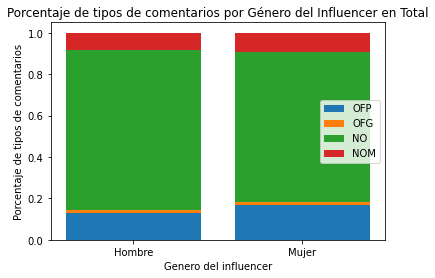

In [ ]:
grupos = dfTotal["influencer_gender"].unique().tolist()
ofp = []
ofg = []
no = []
nom = []

for i in dfTotal["influencer_gender"].unique().tolist():
  ofp.append(dicInfluencerGenderTotal[i][0]/arrayTotalNumComentariosInfluencerGender[i])
  ofg.append(dicInfluencerGenderTotal[i][1]/arrayTotalNumComentariosInfluencerGender[i])
  no.append(dicInfluencerGenderTotal[i][2]/arrayTotalNumComentariosInfluencerGender[i])
  nom.append(dicInfluencerGenderTotal[i][3]/arrayTotalNumComentariosInfluencerGender[i])



indice = np.arange(len(grupos))
 
plt.bar(indice, ofp, label='OFP')
plt.bar(indice, ofg, label='OFG',bottom=np.array(ofp))
plt.bar(indice, no, label='NO',bottom=np.array(ofp)+np.array(ofg))
plt.bar(indice, nom, label='NOM',bottom=np.array(ofp)+np.array(ofg)+np.array(no)) 
 
plt.xticks(indice, ["Hombre","Mujer"])
plt.ylabel("Porcentaje de tipos de comentarios")
plt.xlabel("Genero del influencer")
plt.title('Porcentaje de tipos de comentarios por Género del Influencer en Total')
plt.legend(loc='best')
 
plt.show()

Por red social:

In [ ]:
#Creamos los diccionarios de comentarios de cada archivo
dicMediaTrain={}
for i in dfTrain["media"].unique().tolist():
  dicMediaTrain[i]=[0,0,0,0]

dicMediaTest={}
for i in dfTest["media"].unique().tolist():
  dicMediaTest[i]=[0,0,0,0]

dicMediaValidation={}
for i in dfValidation["media"].unique().tolist():
  dicMediaValidation[i]=[0,0,0,0]

dicMediaTotal={}
for i in dfTotal["media"].unique().tolist():
  dicMediaTotal[i]=[0,0,0,0]

# Recorremos los comentarios, actualizando los diccionarios creados anteriormente:
for i in dfTrain.index:
  dicMediaTrain[dfTrain["media"][i]][dfTrain["label"][i]] += 1

for i in dfTest.index:
  dicMediaTest[dfTest["media"][i]][dfTest["label"][i]] += 1

for i in dfValidation.index:
  dicMediaValidation[dfValidation["media"][i]][dfValidation["label"][i]] += 1

for i in dfTotal.index:
  dicMediaTotal[dfTotal["media"][i]][dfTotal["label"][i]] += 1

# Vemos el numero de comentarios que recibe cada influencer:
arrayTrainNumComentariosMedia=dfTrain["media"].value_counts()

arrayTestNumComentariosMedia=dfTest["media"].value_counts()

arrayValidationNumComentariosMedia=dfValidation["media"].value_counts()

arrayTotalNumComentariosMedia=dfTotal["media"].value_counts()

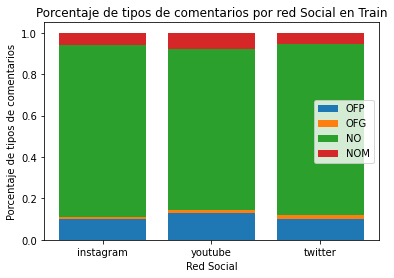

In [ ]:
grupos = dfTrain["media"].unique().tolist()
ofp = []
ofg = []
no = []
nom = []

for i in dfTrain["media"].unique().tolist():
  ofp.append(dicMediaTrain[i][0]/arrayTrainNumComentariosMedia[i])
  ofg.append(dicMediaTrain[i][1]/arrayTrainNumComentariosMedia[i])
  no.append(dicMediaTrain[i][2]/arrayTrainNumComentariosMedia[i])
  nom.append(dicMediaTrain[i][3]/arrayTrainNumComentariosMedia[i])



indice = np.arange(len(grupos))
 
plt.bar(indice, ofp, label='OFP')
plt.bar(indice, ofg, label='OFG',bottom=np.array(ofp))
plt.bar(indice, no, label='NO',bottom=np.array(ofp)+np.array(ofg))
plt.bar(indice, nom, label='NOM',bottom=np.array(ofp)+np.array(ofg)+np.array(no)) 
 
plt.xticks(indice, grupos)
plt.ylabel("Porcentaje de tipos de comentarios")
plt.xlabel("Red Social")
plt.title('Porcentaje de tipos de comentarios por red Social en Train')
plt.legend(loc='best')
 
plt.show()

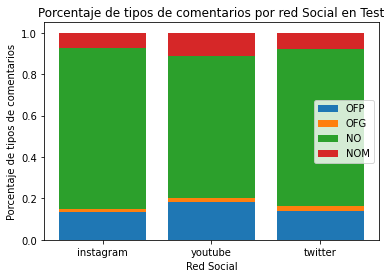

In [ ]:
grupos = dfTest["media"].unique().tolist()
ofp = []
ofg = []
no = []
nom = []

for i in dfTest["media"].unique().tolist():
  ofp.append(dicMediaTest[i][0]/arrayTestNumComentariosMedia[i])
  ofg.append(dicMediaTest[i][1]/arrayTestNumComentariosMedia[i])
  no.append(dicMediaTest[i][2]/arrayTestNumComentariosMedia[i])
  nom.append(dicMediaTest[i][3]/arrayTestNumComentariosMedia[i])



indice = np.arange(len(grupos))
 
plt.bar(indice, ofp, label='OFP')
plt.bar(indice, ofg, label='OFG',bottom=np.array(ofp))
plt.bar(indice, no, label='NO',bottom=np.array(ofp)+np.array(ofg))
plt.bar(indice, nom, label='NOM',bottom=np.array(ofp)+np.array(ofg)+np.array(no)) 
 
plt.xticks(indice, grupos)
plt.ylabel("Porcentaje de tipos de comentarios")
plt.xlabel("Red Social")
plt.title('Porcentaje de tipos de comentarios por red Social en Test')
plt.legend(loc='best')
 
plt.show()

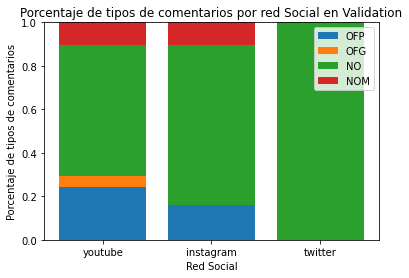

In [ ]:
grupos = dfValidation["media"].unique().tolist()
ofp = []
ofg = []
no = []
nom = []

for i in dfValidation["media"].unique().tolist():
  ofp.append(dicMediaValidation[i][0]/arrayValidationNumComentariosMedia[i])
  ofg.append(dicMediaValidation[i][1]/arrayValidationNumComentariosMedia[i])
  no.append(dicMediaValidation[i][2]/arrayValidationNumComentariosMedia[i])
  nom.append(dicMediaValidation[i][3]/arrayValidationNumComentariosMedia[i])



indice = np.arange(len(grupos))
 
plt.bar(indice, ofp, label='OFP')
plt.bar(indice, ofg, label='OFG',bottom=np.array(ofp))
plt.bar(indice, no, label='NO',bottom=np.array(ofp)+np.array(ofg))
plt.bar(indice, nom, label='NOM',bottom=np.array(ofp)+np.array(ofg)+np.array(no)) 
 
plt.xticks(indice, grupos)
plt.ylabel("Porcentaje de tipos de comentarios")
plt.xlabel("Red Social")
plt.title('Porcentaje de tipos de comentarios por red Social en Validation')
plt.legend(loc='best')
 
plt.show()

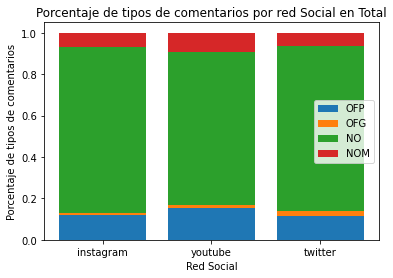

In [ ]:
grupos = dfTotal["media"].unique().tolist()
ofp = []
ofg = []
no = []
nom = []

for i in dfTotal["media"].unique().tolist():
  ofp.append(dicMediaTotal[i][0]/arrayTotalNumComentariosMedia[i])
  ofg.append(dicMediaTotal[i][1]/arrayTotalNumComentariosMedia[i])
  no.append(dicMediaTotal[i][2]/arrayTotalNumComentariosMedia[i])
  nom.append(dicMediaTotal[i][3]/arrayTotalNumComentariosMedia[i])



indice = np.arange(len(grupos))
 
plt.bar(indice, ofp, label='OFP')
plt.bar(indice, ofg, label='OFG',bottom=np.array(ofp))
plt.bar(indice, no, label='NO',bottom=np.array(ofp)+np.array(ofg))
plt.bar(indice, nom, label='NOM',bottom=np.array(ofp)+np.array(ofg)+np.array(no)) 
 
plt.xticks(indice, grupos)
plt.ylabel("Porcentaje de tipos de comentarios")
plt.xlabel("Red Social")
plt.title('Porcentaje de tipos de comentarios por red Social en Total')
plt.legend(loc='best')
 
plt.show()

# Nubes de palabras

Vamos a juntar todos los archivos en un único dataframe para así ver todas las palabras más frequentes en los textos de cada etiqueta.

In [ ]:
!pip install wordCloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords=stopwords.words('spanish')

Para la etiqueta OFP:

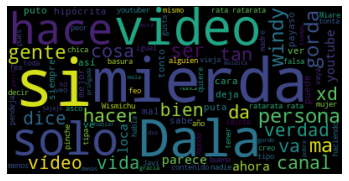

In [ ]:
info = dfTotal[dfTotal.label==0]["comment"]
info= info.tolist()
info = " ".join(info)
wordCloud = WordCloud(max_words=100,stopwords=stopWords).generate(info)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Para la etiqueta OFG:

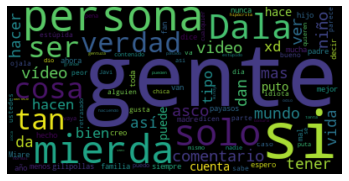

In [ ]:
info = dfTotal[dfTotal.label==1]["comment"]
info= info.tolist()
info = " ".join(info)
wordCloud = WordCloud(max_words=100,stopwords=stopWords).generate(info)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Para la etiqueta NO:

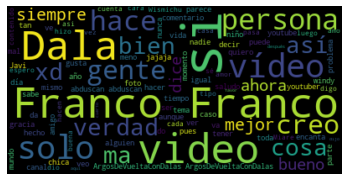

In [ ]:
info = dfTotal[dfTotal.label==2]["comment"]
info= info.tolist()
info = " ".join(info)
wordCloud = WordCloud(max_words=100,stopwords=stopWords).generate(info)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Para la etiqueta NOE/NOM:

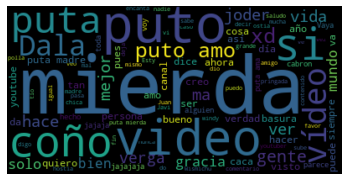

In [ ]:
info = dfTotal[dfTotal.label==3]["comment"]
info= info.tolist()
info = " ".join(info)
wordCloud = WordCloud(max_words=100,stopwords=stopWords).generate(info)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Analizar los textos con TextFlow:

In [ ]:
import os
dir = '/content/drive/MyDrive/Beca/textflow'
os.chdir(dir)

In [ ]:
!pip install transformers
!pip install emoji
import nltk
nltk.download('stopwords')

In [ ]:
from textflow.VolumetryAnalyzer import VolumetryAnalyzer
from textflow.StylometryAnalyzer import StylometryAnalyzer
from textflow.POSAnalyzer import POSAnalyzer
from textflow.PolarityAnalyzer import PolarityAnalyzer
from textflow.LemmaAnalyzer import LemmaAnalyzer
from textflow.EmotionAnalyzer import EmotionAnalyzer
from textflow.ComplexityAnalyzer import ComplexityAnalyzer
from textflow.NERAnalyzer import NERAnalyzer
from textflow.EmojiAnalyzer import EmojiAnalyzer
from textflow.IronityAnalyzer import IronityAnalyzer
from textflow.NGramsAnalyzer import NGramsAnalyzer
from textflow.SequenceString import SequenceString

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
nltk.download('stopwords')

#Creamos los analizadores
v = VolumetryAnalyzer()
st = StylometryAnalyzer(stopwords.words('spanish'),tokenizer = WordPunctTokenizer() )
pos = POSAnalyzer()
p = PolarityAnalyzer()
l = LemmaAnalyzer()
e = EmotionAnalyzer()
c = ComplexityAnalyzer()
ner = NERAnalyzer()
ir = IronityAnalyzer()
emoji = EmojiAnalyzer()
n = NGramsAnalyzer()

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
nltk.download('stopwords')

listSequence = []
for index, row in dfTrain.iterrows(): 
  s = SequenceString(row["comment"])
  listSequence.append(s)
  

In [ ]:
for s in listSequence:
  v.analyze(s,"volumetry","text")
  st.analyze(s,"stylometry","text")
  pos.analyze(s,"POS","text")
  p.analyze(s,"polarity","text")
  l.analyze(s,"lemmas","text")
  e.analyze(s,"emotions","text")
  c.analyze(s,"complexity","text")
  ner.analyze(s,"NER","text")
  ir.analyze(s,"ironity","text")
  emoji.analyze(s,"emoji","text")
  try:
    n.analyze(s,"n-grams","text")
  except:
    print("")

In [ ]:
labels = ["volumetry","stylometry","POS","polarity","lemmas","emotions","complexity","NER","ironity","emoji","n-grams"]

dicTotal = {'emotions': [],'polarity': [],'volumetrywords': [], 'volumetryuniqueWords': [], 'volumetrychars': [], 'volumetryavgWordsLen': [],'stylometryuniqueWords': [], 'stylometryTTR': [], 'stylometryRTTR': [], 'stylometryHerdan': [], 'stylometryMass': [],'stylometrySomers': [], 'stylometryDugast': [], 'stylometryHonore': [],'stylometryFreqStopWords':[],'stylometryFreqPuntuationMarks': [], 'stylometryFreqWords': [],'POSsrcPOS':[],'POSFreqPOS':[],'lemmassrclemmas': [],'lemmasuniqueLemmas': [], 'lemmasavgLemmas': [],'complexitynSentences': [], 'complexitynComplexSentence': [], 'complexityavglenSentence': [], 'complexitynPuntuationMarks': [], 'complexitynWords': [], 'complexitynRareWords': [], 'complexitynSyllabes': [], 'complexitynChar': [],'complexityILFW': [], 'complexityLDI': [], 'complexityLC': [], 'complexitySSR': [], 'complexitySCI': [], 'complexityARI': [],'complexityhuerta': [], 'complexityIFSZ': [], 'complexitypolini': [], 'complexitymu': [], 'complexityminage': [], 'complexitySOL': [], 'complexitycrawford': [], 'complexitymin_depth': [], 'complexitymax_depth': [], 'complexitymean_depth': [],'ironity':[],"NERsrcNER" : [],'NERentidades' : [],'NERfreqEntidades': [],'emojiTextWithoutEmoji': [],'emojiFreqEmoji': [],'emojiNumEmojis': [],'n-gramsn-grams': [],'n-gramsfreqN-Grams': []}

dfTablaTrain = pd.DataFrame()

for seq in listSequence: 
  for l in seq.metadata:
    if l in labels:
      if l == "polarity" or l == "emotions" or l == "ironity":
        dicTotal[l].append(seq.metadata[l][0])
      else:
        for key in seq.metadata[l][0]:
          dicTotal[str(l+key)].append(seq.metadata[l][0][key])

for k in dicTotal:
  dfTablaTrain[str(k)] = dicTotal[k]

In [ ]:
dfTablaTrain

,emotions,polarity,volumetrywords,volumetryuniqueWords,volumetrychars,volumetryavgWordsLen,stylometryuniqueWords,stylometryTTR,stylometryRTTR,stylometryHerdan,...,complexitymean_depth,ironity,NERsrcNER,NERentidades,NERfreqEntidades,emojiTextWithoutEmoji,emojiFreqEmoji,emojiNumEmojis,n-gramsn-grams,n-gramsfreqN-Grams
0,"[{'label': 'others', 'score': 0.87734740972518...","[{'label': 'NEG', 'score': 0.00121870683506131...",14,9,56,4,5,0.333333,1.290994,0.594316,...,4.0,"[{'label': 'NI', 'score': 0.004546262323856354...","En vez de la magia de mi melena , la magia de ...",{},{},"En vez de la magia de mi melena, la magia de m...",{},0,"[magia melena,, magia nariz, melena, magia, na...","{'magia melena,': 1, 'magia nariz': 1, 'melena..."
1,"[{'label': 'others', 'score': 0.93736356496810...","[{'label': 'NEG', 'score': 0.9640718698501587}...",23,22,135,6,14,0.560000,2.800000,0.819869,...,4.0,"[{'label': 'NI', 'score': 0.13979065418243408}...","A ver , los milenials y la gente normal necesi...",{},{},"A ver, los milenials y la gente normal necesit...",{},0,"[comentando salseos., contigo comentando, das ...","{'comentando salseos.': 1, 'contigo comentando..."
2,"[{'label': 'others', 'score': 0.01087775733321...","[{'label': 'NEG', 'score': 0.00068502052454277...",32,26,165,5,13,0.371429,2.197401,0.721434,...,6.0,"[{'label': 'NI', 'score': 0.7510678172111511},...",Me encanta todo el contenido que haces se nota...,"{'PER': {'haces.': 1}, 'MISC': {'😘😘😘💙💙💙🔥🔥🔥🔥': 1}}","{'PER': 1, 'MISC': 1}",Me encanta todo el contenido que haces se nota...,"{':manos_aplaudiendo:': 2, ':cara_lanzando_un_...",12,"[asi crack👏👏, contenido haces, crack👏👏 gracias...","{'asi crack👏👏': 1, 'contenido haces': 1, 'crac..."
3,"[{'label': 'others', 'score': 0.39910930395126...","[{'label': 'NEG', 'score': 0.9986218214035034}...",18,15,81,4,10,0.526316,2.294157,0.782011,...,6.0,"[{'label': 'NI', 'score': 0.9619589447975159},...",a PER sige así que vales mucho más que 10 o 20...,{'PER': {'laura': 1}},{'PER': 1},a Laura sige así que vales mucho más que 10 o ...,{':cara_sonriendo_con_ojos_de_corazón:': 1},1,"[10 20, 20 30, 30 estúpidos, así vales, estúpi...","{'10 20': 1, '20 30': 1, '30 estúpidos': 1, 'a..."
4,"[{'label': 'others', 'score': 0.04500205442309...","[{'label': 'NEG', 'score': 0.9981486797332764}...",100,79,560,6,41,0.338843,3.727273,0.774340,...,6.0,"[{'label': 'NI', 'score': 0.9972447156906128},...","Y si no mes gusta PER , que hacen aquí , lárgu...","{'PER': {'dalas': 1, 'qui': 1}}",{'PER': 2},"Y si no mes gusta Dalas, que hacen aquí,lárgue...",{},0,"[""pero si, abojados, jueces,, algo"" dios, anda...","{'""pero si': 1, 'abojados, jueces,': 1, 'algo""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,"[{'label': 'others', 'score': 0.13153640925884...","[{'label': 'NEG', 'score': 0.998689591884613},...",8,8,40,5,5,0.625000,1.767767,0.773976,...,4.0,"[{'label': 'NI', 'score': 0.946291446685791}, ...",Hijo de tu puta madre estoy mamadisimo 😎,{},{},Hijo de tu puta madre estoy mamadisimo cara s...,{':cara_sonriendo_con_gafas_de_sol:': 1},1,"[hijo puta, madre mamadisimo, mamadisimo 😎, pu...","{'hijo puta': 1, 'madre mamadisimo': 1, 'mamad..."
16706,"[{'label': 'others', 'score': 0.06494721025228...","[{'label': 'NEG', 'score': 0.9990791082382202}...",16,15,70,4,9,0.529412,2.182821,0.775524,...,3.0,"[{'label': 'NI', 'score': 0.9841604828834534},...","yo que hace 4 años lo veía , ahora me doy cuen...",{},{},"yo que hace 4 años lo veía, ahora me doy cuent...",{},0,"[4 años, ahora doy, años veía,, cuenta mierda,...","{'4 años': 1, 'ahora doy': 1, 'años veía,': 1,..."
16707,"[{'label': 'others', 'score': 0.78780895471572...","[{'label': 'NEG', 'score': 0.00065603485563769...",5,5,23,5,3,0.600000,1.341641,0.682606,...,3.0,"[{'label': 'NI', 'score': 0.003996145445853472...",Esta re blanco el wismi,{},{},Esta re blanco el wismi,{},0,"[blanco wismi, re blanco]","{'blanco wismi': 1, 're blanco': 1}"
16708,"[{'label': 'others'

In [ ]:
dfTablaTrain.to_csv("TrainAnalyze.csv")

In [ ]:
listSequenceTest = []
for index, row in dfTest.iterrows(): 
  s = SequenceString(row["comment"])
  listSequenceTest.append(s)


In [ ]:
listSequenceTest

In [ ]:
for s in listSequenceTest:
  print(s.metadata["text"])
  v.analyze(s,"volumetry","text")
  st.analyze(s,"stylometry","text")
  pos.analyze(s,"POS","text")
  p.analyze(s,"polarity","text")
  l.analyze(s,"lemmas","text")
  e.analyze(s,"emotions","text")
  c.analyze(s,"complexity","text")
  ner.analyze(s,"NER","text")
  ir.analyze(s,"ironity","text")
  emoji.analyze(s,"emoji","text")
  try:
    n.analyze(s,"n-grams","text")
  except:
    print("")

In [ ]:
labels = ["volumetry","stylometry","POS","polarity","lemmas","emotions","complexity","NER","ironity","emoji","n-grams"]

dicTotal = {'emotions': [],'polarity': [],'volumetrywords': [], 'volumetryuniqueWords': [], 'volumetrychars': [], 'volumetryavgWordsLen': [],'stylometryuniqueWords': [], 'stylometryTTR': [], 'stylometryRTTR': [], 'stylometryHerdan': [], 'stylometryMass': [],'stylometrySomers': [], 'stylometryDugast': [], 'stylometryHonore': [],'stylometryFreqStopWords':[],'stylometryFreqPuntuationMarks': [], 'stylometryFreqWords': [],'POSsrcPOS':[],'POSFreqPOS':[],'lemmassrclemmas': [],'lemmasuniqueLemmas': [], 'lemmasavgLemmas': [],'complexitynSentences': [], 'complexitynComplexSentence': [], 'complexityavglenSentence': [], 'complexitynPuntuationMarks': [], 'complexitynWords': [], 'complexitynRareWords': [], 'complexitynSyllabes': [], 'complexitynChar': [],'complexityILFW': [], 'complexityLDI': [], 'complexityLC': [], 'complexitySSR': [], 'complexitySCI': [], 'complexityARI': [],'complexityhuerta': [], 'complexityIFSZ': [], 'complexitypolini': [], 'complexitymu': [], 'complexityminage': [], 'complexitySOL': [], 'complexitycrawford': [], 'complexitymin_depth': [], 'complexitymax_depth': [], 'complexitymean_depth': [],'ironity':[],"NERsrcNER" : [],'NERentidades' : [],'NERfreqEntidades': [],'emojiTextWithoutEmoji': [],'emojiFreqEmoji': [],'emojiNumEmojis': [],'n-gramsn-grams': [],'n-gramsfreqN-Grams': []}

dfTablaTest = pd.DataFrame()

for seq in listSequenceTest: 
  for l in seq.metadata:
    if l in labels:
      if l == "polarity" or l == "emotions" or l == "ironity":
        dicTotal[l].append(seq.metadata[l][0])
      else:
        for key in seq.metadata[l][0]:
          dicTotal[str(l+key)].append(seq.metadata[l][0][key])

for k in dicTotal:
  dfTablaTest[str(k)] = dicTotal[k]

In [ ]:
dfTablaTest

,emotions,polarity,volumetrywords,volumetryuniqueWords,volumetrychars,volumetryavgWordsLen,stylometryuniqueWords,stylometryTTR,stylometryRTTR,stylometryHerdan,...,complexitymean_depth,ironity,NERsrcNER,NERentidades,NERfreqEntidades,emojiTextWithoutEmoji,emojiFreqEmoji,emojiNumEmojis,n-gramsn-grams,n-gramsfreqN-Grams
0,"[{'label': 'others', 'score': 0.76788395643234...","[{'label': 'NEG', 'score': 0.00033252371940761...",2,2,15,8,2,1.000000,1.414214,1.000000,...,2.0,"[{'label': 'NI', 'score': 0.008321356028318405...",MISC MISC,{'MISC': {'lacasito moreno': 1}},{'MISC': 1},Lacasito moreno,{},0,[lacasito moreno],{'lacasito moreno': 1}
1,"[{'label': 'others', 'score': 0.83894610404968...","[{'label': 'NEG', 'score': 0.3595023453235626}...",6,6,30,5,3,0.500000,1.224745,0.613147,...,2.5,"[{'label': 'NI', 'score': 0.00480395182967186}...",Yo pensaba que celopan era gay,{},{},Yo pensaba que celopan era gay,{},0,"[celopan gay, pensaba celopan]","{'celopan gay': 1, 'pensaba celopan': 1}"
2,"[{'label': 'others', 'score': 0.81433206796646...","[{'label': 'NEG', 'score': 0.00620029866695404...",4,4,15,4,2,0.500000,1.000000,0.500000,...,3.0,"[{'label': 'NI', 'score': 0.013071196153759956...",la bruja del 77,{},{},la bruja del 77,{},0,[bruja 77],{'bruja 77': 1}
3,"[{'label': 'others', 'score': 0.53228121995925...","[{'label': 'NEG', 'score': 0.01206183061003685...",6,6,23,4,4,0.666667,1.632993,0.773706,...,2.0,"[{'label': 'NI', 'score': 0.010097404941916466...",Se va a liar bien gorda,{},{},Se va a liar bien gorda,{},0,"[bien gorda, liar bien, va liar]","{'bien gorda': 1, 'liar bien': 1, 'va liar': 1}"
4,"[{'label': 'others', 'score': 0.06433184444904...","[{'label': 'NEG', 'score': 0.9992963075637817}...",8,8,48,6,5,0.625000,1.767767,0.773976,...,3.0,"[{'label': 'NI', 'score': 0.028419990092515945...",Y LOC que chucha me importa boliviano hijodeputa,{'LOC': {'ami': 1}},{'LOC': 1},Y Ami que chucha me importa boliviano hijodeputa,{},0,"[ami chucha, boliviano hijodeputa, chucha impo...","{'ami chucha': 1, 'boliviano hijodeputa': 1, '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13601,"[{'label': 'others', 'score': 0.73301124572753...","[{'label': 'NEG', 'score': 0.9937878251075745}...",34,24,140,4,8,0.235294,1.371989,0.589685,...,8.0,"[{'label': 'NI', 'score': 0.009716915898025036...",No es por nada pero te vas para el infierno a ...,{'PER': {'dios': 1}},{'PER': 1},No es por nada pero te vas para el infierno a ...,{},0,"[creo hombre, dios gusta, gusta creo, hombre m...","{'creo hombre': 1, 'dios gusta': 1, 'gusta cre..."
13602,"[{'label': 'others', 'score': 0.83340889215469...","[{'label': 'NEG', 'score': 0.9990726709365845}...",49,43,269,5,25,0.438596,3.311331,0.796150,...,5.0,"[{'label': 'NI', 'score': 0.9815095663070679},...","Dalas : "" ¡ No soy un psicópata ! "" MISC MIS...","{'MISC': {'also dalas: *le': 1}, 'LOC': {'xd d...","{'MISC': 1, 'LOC': 1}","Dalas: ""¡No soy un psicópata!"" Also Dalas: *L...",{},0,"[""¡no psicópata!"", *le habla, also dalas:, cin...","{'""¡no psicópata!""': 1, '*le habla': 1, 'also ..."
13603,"[{'label': 'others', 'score': 0.21351650357246...","[{'label': 'NEG', 'score': 0.999384880065918},...",16,16,69,4,8,0.500000,2.000000,0.750000,...,4.0,"[{'label': 'NI', 'score': 0.9867968559265137},...",A mi esa señora me da puto mal royo desde que ...,{},{},A mi esa señora me da puto mal royo desde que ...,{},0,"[14 años, da puto, descubrí 14, mal royo, puto...","{'14 años': 1, 'da puto': 1, 'descubrí 14': 1,..."
13604,"[{'label': 'others', 'score': 0.97347688674926...","[{'label': 'NEG', 'score': 0.8026707768440247}...",32,29,153,5,15,0.468750,2.651650,0.781378,...,6.0,"[{'label': 'NI', 'score': 0.002919729799032211...",En todas las familias hay un dalas 😂 creo que ...,{'MISC': {'🤭🤭': 1}},{'MISC': 1},En todas las familias hay un dalas cara llora...,"{':cara_llorando_de_risa:': 4, ':cara_con_mano...",6,"[creo dalas, dalas familia, dalas 😂, dalas 🤭🤭,...","{'creo dalas': 1, 'dala

In [ ]:
dfTablaTest.to_csv("TestAnalyze.csv")

In [ ]:
listSequenceValidation = []
for index, row in dfValidation.iterrows(): 
  s = SequenceString(row["comment"])
  listSequenceValidation.append(s)


In [ ]:
os.getcwd()

'/content/drive/MyDrive/TFG/Material Inicial'

In [ ]:

for s in listSequenceValidation:
  v.analyze(s,"volumetry","text")
  st.analyze(s,"stylometry","text")
  pos.analyze(s,"POS","text")
  p.analyze(s,"polarity","text")
  l.analyze(s,"lemmas","text")
  e.analyze(s,"emotions","text")
  c.analyze(s,"complexity","text")
  ner.analyze(s,"NER","text")
  ir.analyze(s,"ironity","text")
  emoji.analyze(s,"emoji","text")
  try:
    n.analyze(s,"n-grams","text")
  except:
    print("")


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
labels = ["volumetry","stylometry","POS","polarity","lemmas","emotions","complexity","NER","ironity","emoji","n-grams"]

dicTotal = {'emotions': [],'polarity': [],'volumetrywords': [], 'volumetryuniqueWords': [], 'volumetrychars': [], 'volumetryavgWordsLen': [],'stylometryuniqueWords': [], 'stylometryTTR': [], 'stylometryRTTR': [], 'stylometryHerdan': [], 'stylometryMass': [],'stylometrySomers': [], 'stylometryDugast': [], 'stylometryHonore': [],'stylometryFreqStopWords':[],'stylometryFreqPuntuationMarks': [], 'stylometryFreqWords': [],'POSsrcPOS':[],'POSFreqPOS':[],'lemmassrclemmas': [],'lemmasuniqueLemmas': [], 'lemmasavgLemmas': [],'complexitynSentences': [], 'complexitynComplexSentence': [], 'complexityavglenSentence': [], 'complexitynPuntuationMarks': [], 'complexitynWords': [], 'complexitynRareWords': [], 'complexitynSyllabes': [], 'complexitynChar': [],'complexityILFW': [], 'complexityLDI': [], 'complexityLC': [], 'complexitySSR': [], 'complexitySCI': [], 'complexityARI': [],'complexityhuerta': [], 'complexityIFSZ': [], 'complexitypolini': [], 'complexitymu': [], 'complexityminage': [], 'complexitySOL': [], 'complexitycrawford': [], 'complexitymin_depth': [], 'complexitymax_depth': [], 'complexitymean_depth': [],'ironity':[],"NERsrcNER" : [],'NERentidades' : [],'NERfreqEntidades': [],'emojiTextWithoutEmoji': [],'emojiFreqEmoji': [],'emojiNumEmojis': [],'n-gramsn-grams': [],'n-gramsfreqN-Grams': []}

dfTablaValidation = pd.DataFrame()

for seq in listSequenceValidation: 
  for l in seq.metadata:
    if l in labels:
      if l == "polarity" or l == "emotions" or l == "ironity":
        dicTotal[l].append(seq.metadata[l][0])
      else:
        for key in seq.metadata[l][0]:
          dicTotal[str(l+key)].append(seq.metadata[l][0][key])

for k in dicTotal:
  dfTablaValidation[str(k)] = dicTotal[k]

In [ ]:
dfTablaValidation

,emotions,polarity,volumetrywords,volumetryuniqueWords,volumetrychars,volumetryavgWordsLen,stylometryuniqueWords,stylometryTTR,stylometryRTTR,stylometryHerdan,...,complexitymean_depth,ironity,NERsrcNER,NERentidades,NERfreqEntidades,emojiTextWithoutEmoji,emojiFreqEmoji,emojiNumEmojis,n-gramsn-grams,n-gramsfreqN-Grams
0,"[{'label': 'others', 'score': 0.11764498800039...","[{'label': 'NEG', 'score': 0.00093843380454927...",29,29,177,6,20,0.606061,3.481553,0.856778,...,8.000000,"[{'label': 'NI', 'score': 0.09868667274713516}...",Me encanta el videooo porciento aidii he subid...,{},{},Me encanta el videooo porciento aidii he subid...,{':cara_sonriendo_con_ojos_de_corazón:': 4},4,"[@dulcealba.idolas puedes, aidii subido, costa...","{'@dulcealba.idolas puedes': 1, 'aidii subido'..."
1,"[{'label': 'others', 'score': 0.96459478139877...","[{'label': 'NEG', 'score': 0.00211914465762674...",56,45,272,5,29,0.446154,3.597007,0.806656,...,4.500000,"[{'label': 'NI', 'score': 0.4464564919471741},...","Ropa cara?veo dulceida shop , Zara .. y de tod...","{'MISC': {'lo único caro': 1}, 'LOC': {'prada'...","{'MISC': 1, 'LOC': 2}","Ropa cara?veo dulceida shop, Zara.. y de todas...",{},0,"[adaptarlo cada, apaño. creo, bolso prada, cad...","{'adaptarlo cada': 1, 'apaño. creo': 1, 'bolso..."
2,"[{'label': 'others', 'score': 0.78055804967880...","[{'label': 'NEG', 'score': 0.06052910909056663...",7,7,33,5,4,0.400000,1.264911,0.602060,...,4.000000,"[{'label': 'NI', 'score': 0.012135353870689869...",Y la perra seguia y seguia.jpg : v,{},{},Y la perra seguia y seguia.jpg :v,{},0,"[perra seguia, seguia seguia.jpg, seguia.jpg :v]","{'perra seguia': 1, 'seguia seguia.jpg': 1, 's..."
3,"[{'label': 'others', 'score': 0.10061497241258...","[{'label': 'NEG', 'score': 0.9987051486968994}...",2,2,15,8,2,1.000000,1.414214,1.000000,...,2.000000,"[{'label': 'NI', 'score': 0.66839998960495}, {...",Malditas drogas,{},{},Malditas drogas,{},0,[malditas drogas],{'malditas drogas': 1}
4,"[{'label': 'others', 'score': 0.20997625589370...","[{'label': 'NEG', 'score': 0.00058779324172064...",71,52,367,5,30,0.422535,3.560345,0.797901,...,7.000000,"[{'label': 'NI', 'score': 0.9944309592247009},...","perdona el spam , es la primera vez que trato ...",{},{},"perdona el spam , es la primera vez que trato ...",{},0,"[, diferencia, , gustaria, , idiota, , primera...","{', diferencia': 1, ', gustaria': 1, ', idiota..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"[{'label': 'others', 'score': 0.00734974397346...","[{'label': 'NEG', 'score': 0.00044257333502173...",45,38,235,5,24,0.510638,3.500760,0.825437,...,3.333333,"[{'label': 'NI', 'score': 0.007128073833882809...",Me alegra dalas . MISC MISC MISC y me alegra v...,"{'MISC': {'soy nuevo seguidor': 1}, 'ORG': {'s...","{'MISC': 1, 'ORG': 1, 'LOC': 1}",Me alegra dalas . Soy nuevo seguidor y me aleg...,{':cara_guiñando_el_ojo:': 1},1,"[. nuevo, alegra dalas, alegra ver, alguien oc...","{'. nuevo': 1, 'alegra dalas': 1, 'alegra ver'..."
96,"[{'label': 'others', 'score': 0.21690575778484...","[{'label': 'NEG', 'score': 0.8676246404647827}...",8,8,39,5,5,0.555556,1.666667,0.732487,...,3.000000,"[{'label': 'NI', 'score': 0.9784336686134338},...",En resumen LOC le callo la puta boca .,{'LOC': {'dalas': 1}},{'LOC': 1},En resumen Dalas le callo la puta boca.,{},0,"[callo puta, dalas callo, puta boca., resumen ...","{'callo puta': 1, 'dalas callo': 1, 'puta boca..."
97,"[{'label': 'others', 'score': 0.08072220534086...","[{'label': 'NEG', 'score': 0.00144316628575325...",18,16,88,5,9,0.450000,2.012461,0.733452,...,4.000000,"[{'label': 'NI', 'score': 0.003871093504130840...","MISC MISC MISC Que te lleven a PER , a ver las...","{'MISC': {'genial!!': 1, 'caras de belmez': 1,...","{'MISC': 3, 'PER': 1}","Genial!! Que te lleven a Alcaser, a ver las Ca...",{},0,"[alcaser, ver, belmez camping, camping alfaque...","{'alcaser, ver': 1, 'belmez camping': 1, 'camp..."
98,"[{'label': 'others', 'score': 0.79

In [ ]:
dfTablaValidation
dfTablaValidation.to_csv("ValidationAnalyze.csv")